In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, chi2

In [82]:
def chi_squared_test(random_numbers, num_bins, alpha, lam, x_max=10):
    # Обчислюємо спостережувані частоти
    observed_frequencies, bin_edges = np.histogram(random_numbers, bins=num_bins, density=True)
    
    # Обчислюємо середини інтервалів
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Обчислюємо очікувані частоти за допомогою експоненційного розподілу
    expected_frequencies = expon.pdf(bin_centers, scale=1/lam)
    
    # Обчислюємо статистику хі-квадрат
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    
    # Визначаємо ступені свободи
    degrees_of_freedom = num_bins - 1
    
    # Обчислюємо критичне значення хі-квадрат
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical


In [83]:
lambda_values = [1, 5, 10, 20]
num_samples = 10000
alpha = 0.01
num_bins=20

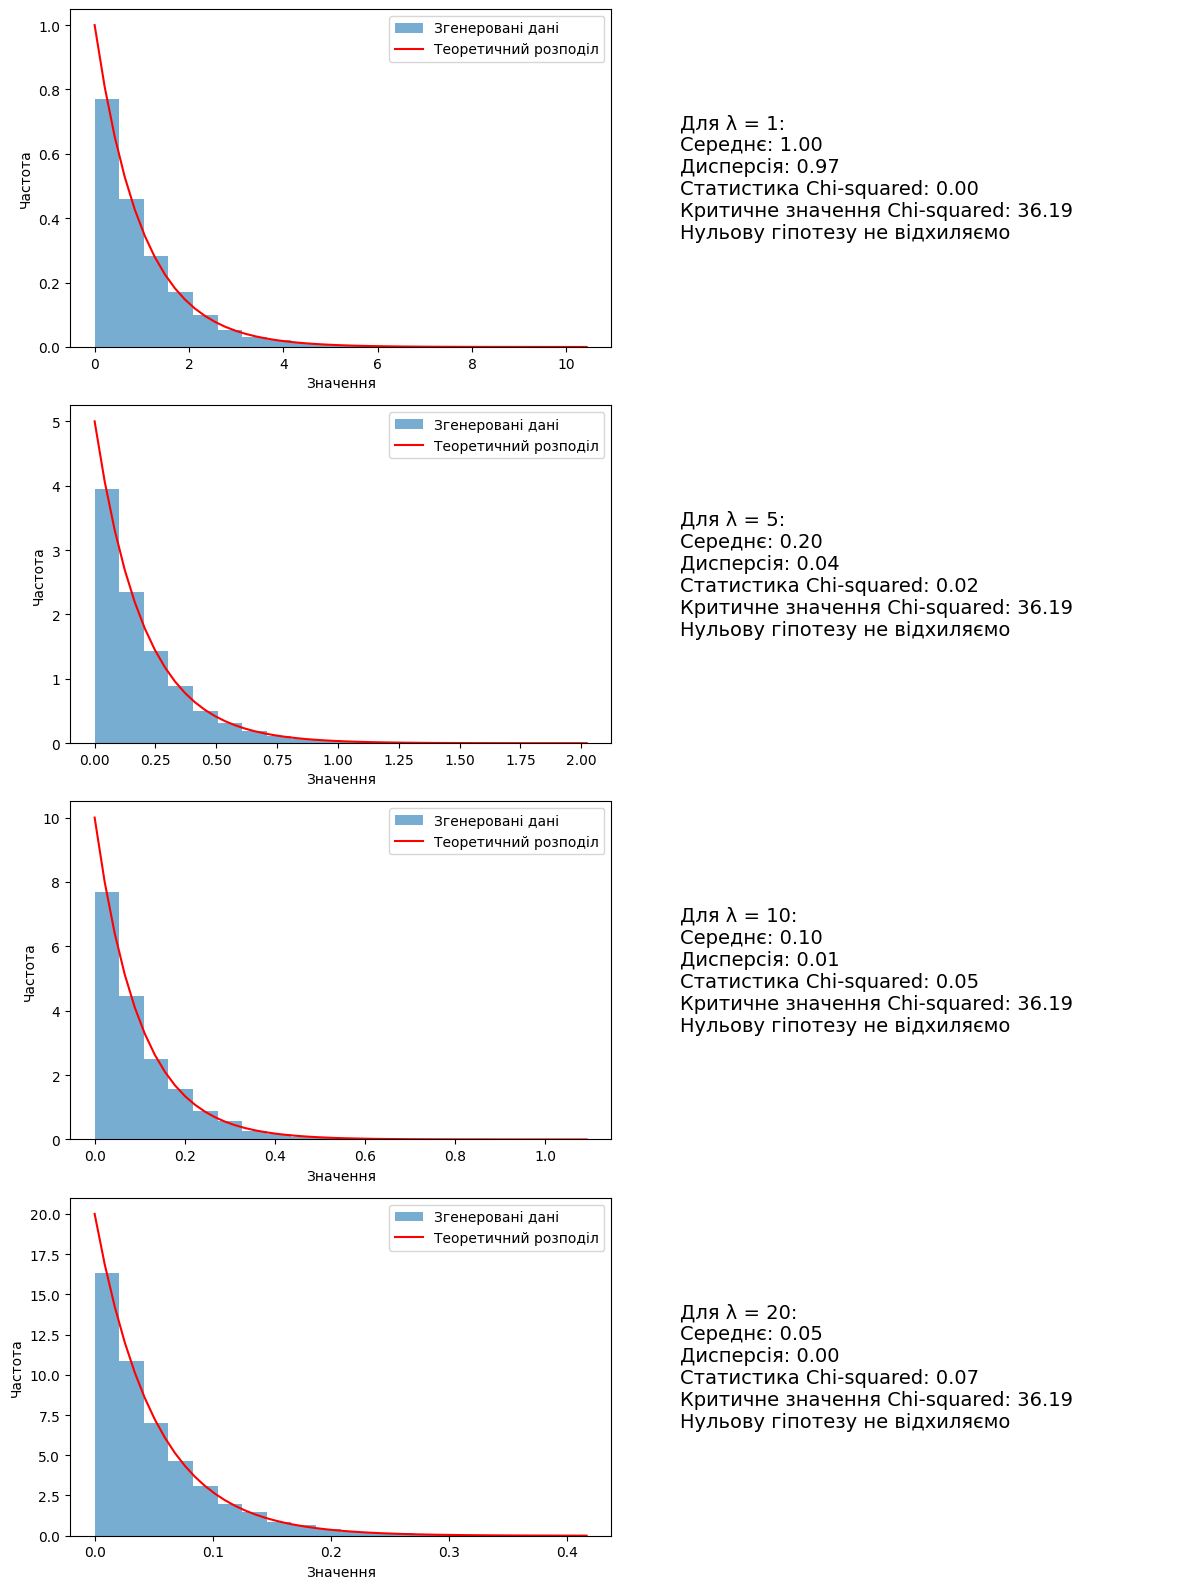

In [84]:
fig, axs = plt.subplots(len(lambda_values), 2, figsize=(12, 16))

for i, lam in enumerate(lambda_values):
    # Генерація вибірки за формулою
    random_numbers = np.random.rand(num_samples)
    random_exp_numbers = - (1 / lam) * np.log(random_numbers)
   
    # Теоретичний розподіл
    x_max = np.max(random_exp_numbers)
    x = np.linspace(0, x_max, 50)
    theoretical_pdf = expon.pdf(x, scale=1/lam) 

    # Побудова гістограми та теоретичного розподілу
    axs[i, 0].hist(random_exp_numbers, bins=num_bins, density=True, alpha=0.6, label='Згенеровані дані')
    axs[i, 0].plot(x, theoretical_pdf, 'r-', label='Теоретичний розподіл')
    
    # Обчислення статистики хі-квадрат і вивід результатів
    chi_squared_statistic, chi_squared_critical = chi_squared_test(random_exp_numbers, num_bins, alpha, lam)

    print(f'lambda = {lam}')
    print(f'chi-squared statistic = {chi_squared_statistic}')
    print(f'chi-squared critical = {chi_squared_critical}')
    print(f'chi-squared statistic <= chi-squared critical: {chi_squared_statistic <= chi_squared_critical}')